In [204]:
# Data Import
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

from pyriemann.classification import MDM
from pyriemann.estimation import ERPCovariances
from tqdm import tqdm

import sys
sys.path.append('./py.BI.EEG.2015b-GIPSA/')
from braininvaders2015b.dataset import BrainInvaders2015b

from scipy.io import loadmat
import numpy as np
import mne

import joblib
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
 
dataset = BrainInvaders2015b() # datapath="T:\Kaggle\BCIBachelorThesis\Data"

In [205]:
dataset.pair_list

sorted_channels = ['FP2_1', 'STI 014', 'PO8_2', 'P4_2', 'P3_2', 'FP1_1', 'F8_2', 'F3_1', 'C4_1', 'PO8_1', 'PO7_2', 'PO10_1', 'O2_2', 'FC5_1', 'F8_1', 'CP6_2', 'AFz_2', 'T8_1', 'T7_1', 'Pz_2', 'Pz_1', 'PO9_2', 'PO9_1', 'PO10_2', 'P8_2', 'P8_1', 'P7_2', 'P7_1', 'P4_1', 'Oz_2', 'O1_2', 'FP2_2', 'FC6_2', 'FC5_2', 'FC2_2', 'FC2_1', 'FC1_2', 'FC1_1', 'F7_1', 'F3_2', 'Cz_2', 'Cz_1', 'CP6_1', 'CP5_2', 'CP2_2', 'CP2_1', 'C4_2', 'C3_2', 'C3_1', 'AFz_1', 'T8_2', 'T7_2', 'P3_1', 'Oz_1', 'O2_1', 'O1_1', 'FP1_2', 'FC6_1', 'F7_2', 'F4_2', 'F4_1', 'CP5_1', 'CP1_2', 'CP1_1', 'PO7_1']
stim_pos = np.where(np.array(sorted_channels)=="STI 014")[0][0]
stim_pos

1

In [206]:
scores = {}

largeRaws = []

for pair in dataset.pair_list[:]: # change this to change nr of pairs
    scores[pair] = {}

    print('pair', str(pair))
    sessions = dataset._get_single_pair_data(pair=pair)
    for session_name in sessions.keys():

        scores[pair][session_name] = {}

        raw = sessions[session_name]['run_1']
        
        # filter channels right away
        pick_channels = sorted_channels[:3]
        raw_subject = raw.copy().pick_channels(pick_channels)
        largeRaws.append(raw_subject) # _subject

pair 1
pair 2
pair 3
pair 4
pair 5
pair 6
pair 7
pair 8
pair 9
pair 10
pair 11
pair 12
pair 13
pair 14
pair 15
pair 16
pair 17
pair 18
pair 19
pair 20
pair 21
pair 22


## Data Inspection

In [207]:


raw.info


<Info | 7 non-empty values
 bads: []
 ch_names: FP1_1, FP2_1, AFz_1, F7_1, F3_1, F4_1, F8_1, FC5_1, FC1_1, ...
 chs: 64 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 65
 projs: []
 sfreq: 512.0 Hz
>

In [208]:
saveMemory = True
if saveMemory:
    del dataset,raw

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge:

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- F

- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 5

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass fil

- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 1691 samples (3.303 sec)



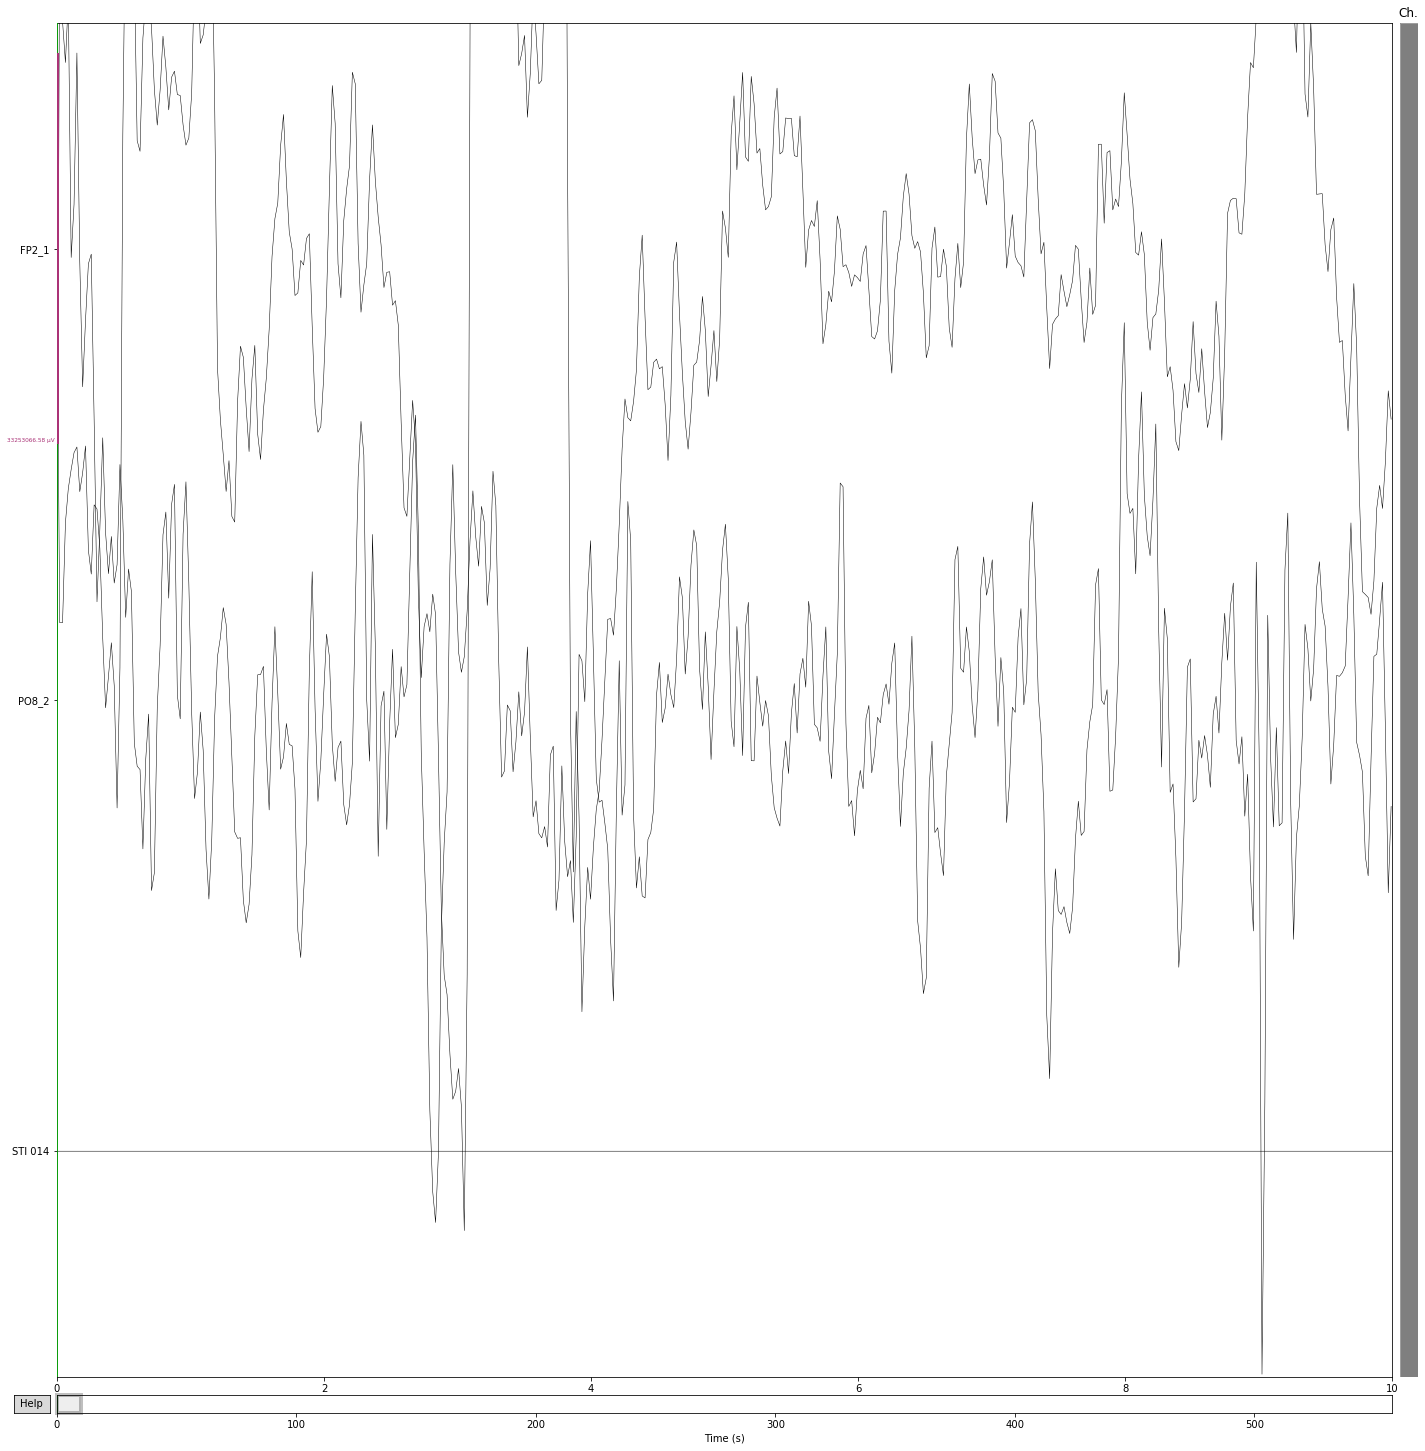

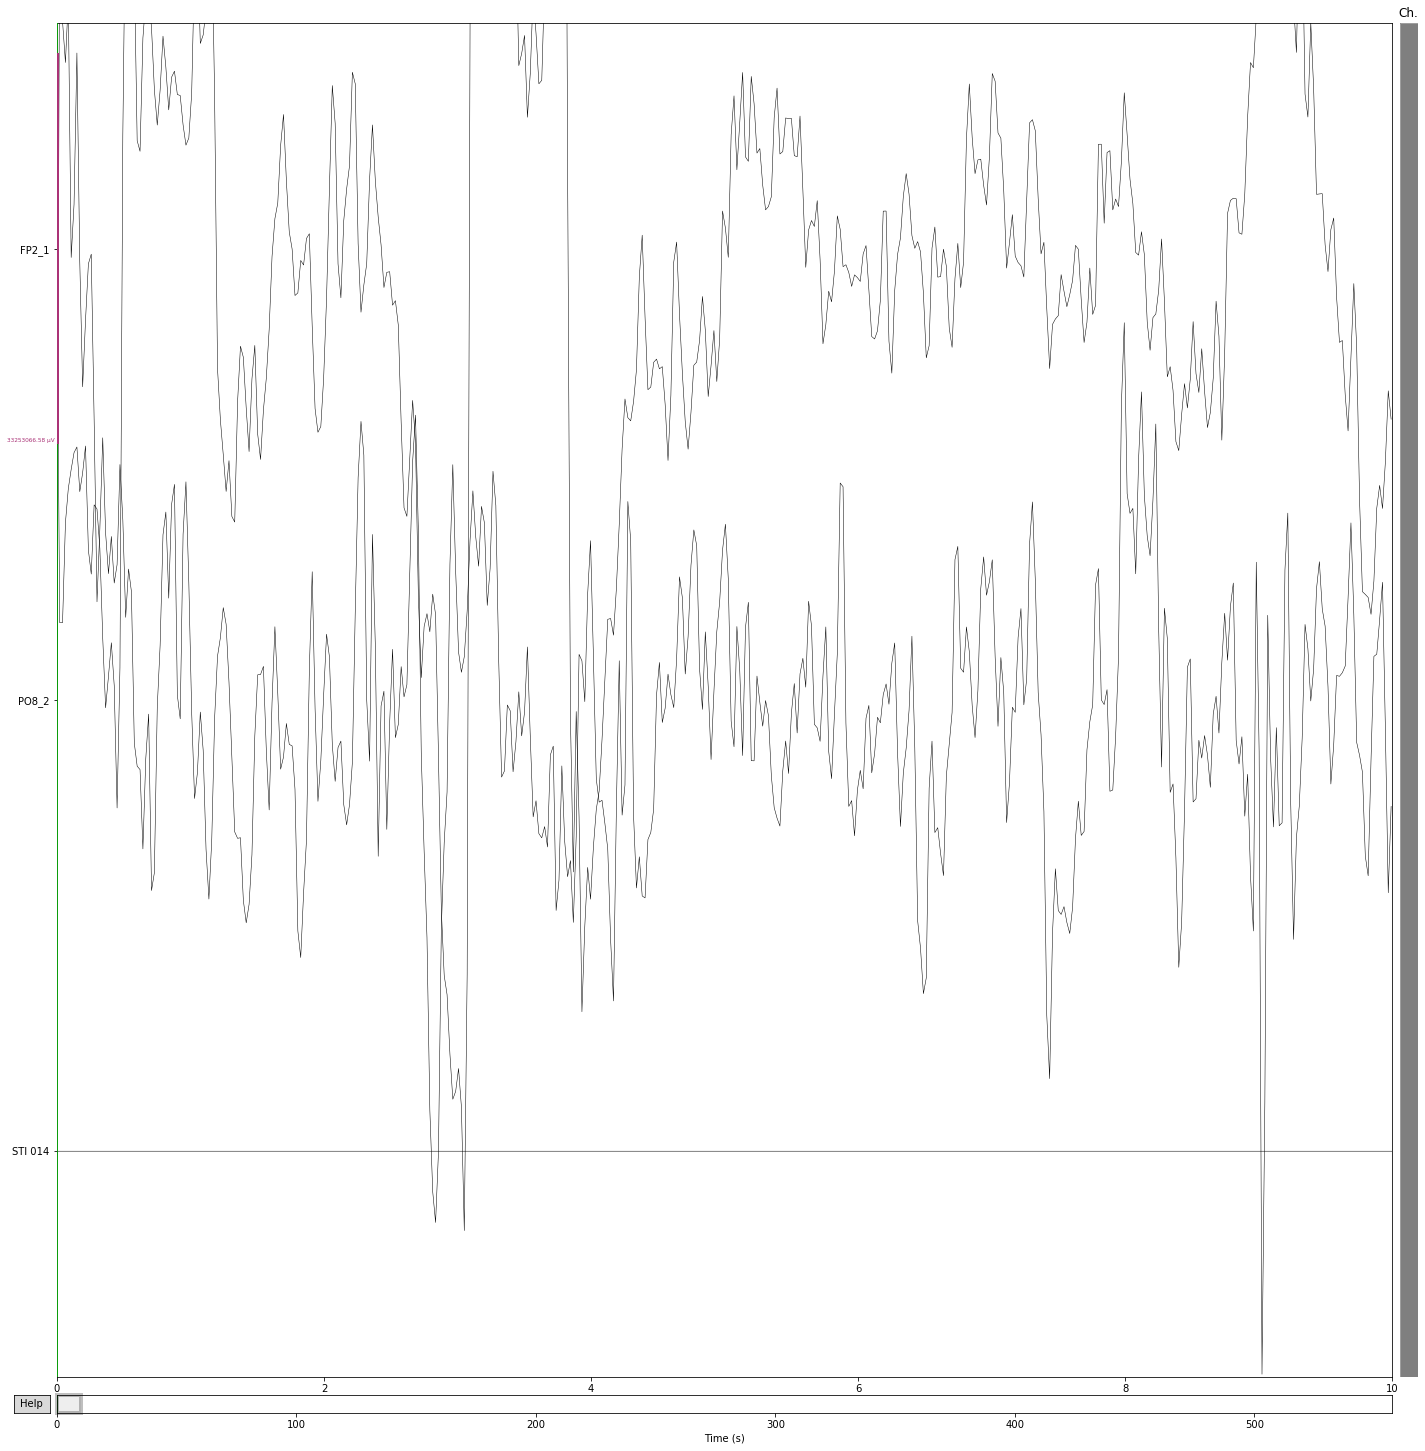

In [209]:
# After filteirng
for raw in largeRaws:
    fmin = 1
    fmax = 15
    raw.filter(fmin, fmax, verbose=True)   
#     raw.plot(scalings='auto')

largeRaws[0].plot(scalings="auto")

In [210]:
allEvents = []
for i,raw in enumerate(largeRaws):
    try:
        events = mne.find_events(raw) #  stim_channel='STI 014'
        allEvents.append(events)
    except ValueError as e:
        print(e)
        print("will skip trial no %d"%i)
# events

834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 163 164 165 181
 182 183 184 185]
834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 162 163 164 165
 180 181 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 161 162 163 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 106 107 108 109 110 111 112 160 161 162 163 164 165
 180 181 182 183 184 185]
834 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 164 165 180 182
 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 162 163 164 165
 180 181 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 107 108 109 110 111 160 162 163 164 180 181 183
 184]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 161 162 163 164 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1

833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 162 164 165 180
 181 182 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 162 163 164 165 181
 182 183 184 185]
833 events found
Event IDs: [  1   2  18 100 102 104 106 107 108 109 110 111 112 160 161 163 164 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 161 162 163 165
 180 181 182 183 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 160 161 162 163 165
 180 181 182 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 162 163 164 181
 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 160 161 162 163 164 165
 180 181 182 183 184 185]
833 events found
Event IDs: [  1   2 100 102 104 105 106 107 108 109 110 111 112 161 163 164 165 180
 181 183 184 185]
833 events found
Event I

In [212]:
len(largeRaws),len(allEvents)

(88, 87)

In [213]:
allEpochs = []
from tqdm import tqdm
for raw,events in tqdm(zip(largeRaws,allEvents)):
    event_id = {'NonTarget': 1, 'Target': 2}
    tmin = 0  # start of each epoch (200ms before the trigger)
    tmax = 0.8  # end of each epoch (500ms after the trigger)
#     print(event_id)
    baseline = None  # means from the first instant to t = 0
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                        baseline=baseline, preload=False)
#     print(epochs)
    allEpochs.append(epochs)

del largeRaws

0it [00:00, ?it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


1it [00:00,  2.76it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline

14it [00:00,  3.89it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


22it [00:00,  5.43it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


31it [00:00,  7.56it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


40it [00:00, 10.37it/s]

659 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline

54it [00:00, 14.32it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


63it [00:10,  2.69it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
659 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline

73it [00:10,  3.80it/s]

660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
660 matching events found
No baseline

87it [00:10,  8.04it/s]


In [214]:
len(allEvents),len(allEpochs)

(87, 87)

## Combining all data



In [215]:
allX = []
ally = []

for epochs in allEpochs:
    X = epochs.get_data()
    # need to drop the stimulus channel
    X = np.delete(X,stim_pos,axis=1)
    y = epochs.events[:,-1]
#     X = X[:,keepChannelsIdx,:]
    y = y - 1  
    allX.append(X)
    ally.append(y)
    
# del allEpochs,allEvents

allX = np.concatenate(allX, axis=0)
ally = np.concatenate(ally, axis=0)
print(np.shape((allX)),np.shape(ally))



Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for 660 events and 411 original time points ...
0 bad epochs dropped
Loading data for

# Classification

In [228]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

x_train, x_test, y_train, y_test = train_test_split(allX,ally, test_size=0.33, random_state=42,shuffle=True) # Xxdawn, ally


# do we have an imbalance?
distr = np.unique(y_train,return_counts=True)
print(distr)
ratio = distr[1][0]/distr[1][1]
print(ratio)
# yes! use class weights to fight this effect
targetsOnly = x_train[y_train==1.]
targetsOnly = np.repeat(targetsOnly,int(ratio)-1,axis=0) # upsample undersampled target array, minus one bc we already have that one set
nradds = len(targetsOnly)
print("upsampled %d trials"%nradds)
x_train = np.concatenate([x_train,targetsOnly])
y_train = np.concatenate([y_train,np.ones(nradds)],axis=0)


class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train), y_train,classes=[0, 1])
print("class weights used: ",class_weights)


# del allX,ally # memory

x_train.shape,y_train.shape


(array([0, 1], dtype=int64), array([30875,  6835], dtype=int64))
4.517190929041697
upsampled 20505 trials
class weights used:  [0.94275304 1.06464887]


T:\Anaconda\envs\bci\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0. 1.], y=[0. 1. 0. ... 1. 1. 1.] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


((58215, 2, 411), (58215,))

In [229]:
from pyriemann.estimation import *

covobj = Covariances(estimator='lwf')
cov_train = covobj.fit_transform(x_train)
# cross validation
mdm = MDM(n_jobs=-1)

accuracy = cross_val_score(mdm, cov_train, y_train)

print("Train avg score: ", accuracy.mean())

# test
cov_test = covobj.transform(x_test)
accuracy = cross_val_score(mdm, cov_test, y_test)

print("Test avg score: ",accuracy.mean())


Train avg score:  0.5090440608090698
Test avg score:  0.5126525583239294


In [230]:
 # cross validation
skf = StratifiedKFold(n_splits=2)

clf1 = make_pipeline(ERPCovariances(estimator='lwf', classes=[1]), MDM(n_jobs=-1))
clf1.fit(x_train,y_train)

scr = cross_val_score(clf1, x_test, y_test, cv=skf, scoring = 'accuracy').mean()
print("Score avg test: ",scr)

Score avg test:  0.4831484871325509


In [231]:
from pyriemann.tangentspace import TangentSpace
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# build your pipeline
covest = Covariances(estimator='lwf')
ts = TangentSpace()
svc = SVC(kernel='linear')

clf = make_pipeline(covest,ts,svc)
# cross validation
clf.fit(x_train,y_train)

accuracy = cross_val_score(clf, x_test, y_test)

print("Test score: ",accuracy.mean())


Test score:  0.8170561065003759


In [235]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

model = Sequential()
model.add(LSTM(units = 50, return_sequences = False, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

# model.add(LSTM(units = 15, return_sequences = True))
# model.add(Dropout(0.2))



model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                92400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 92,451
Trainable params: 92,451
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.models import load_model
from os import path

LOAD = False

if path.exists("p300.h5") and LOAD:
    model = load_model("p300.h5")


In [ ]:
redlr = ReduceLROnPlateau(monitor='accuracy',patience=10)
es = EarlyStopping(monitor='accuracy', min_delta=0.0001,patience=50)

hist = model.fit(x_train,y_train,batch_size=128, validation_data=(x_test,y_test),epochs=2000,callbacks=[es,redlr], class_weight= class_weights)
 #0,8504

Train on 58215 samples, validate on 18574 samples
Epoch 1/2000
58215/58215 [==============================] - 4s 64us/sample - loss: 0.6567 - accuracy: 0.5913 - val_loss: 0.5958 - val_accuracy: 0.7012
Epoch 2/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.6177 - accuracy: 0.6167 - val_loss: 0.5704 - val_accuracy: 0.7180
Epoch 3/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.6058 - accuracy: 0.6221 - val_loss: 0.5608 - val_accuracy: 0.7228
Epoch 4/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5963 - accuracy: 0.6329 - val_loss: 0.5628 - val_accuracy: 0.7068
Epoch 5/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5890 - accuracy: 0.6369 - val_loss: 0.5605 - val_accuracy: 0.6939
Epoch 6/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5851 - accuracy: 0.6405 - val_loss: 0.5616 - val_accuracy: 0.6958
Epoch 7/2000
58215/58215 [==================

58215/58215 [==============================] - 2s 34us/sample - loss: 0.5174 - accuracy: 0.7055 - val_loss: 0.5347 - val_accuracy: 0.6997
Epoch 55/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5145 - accuracy: 0.7087 - val_loss: 0.5238 - val_accuracy: 0.7129
Epoch 56/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5156 - accuracy: 0.7061 - val_loss: 0.5309 - val_accuracy: 0.7094
Epoch 57/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5144 - accuracy: 0.7092 - val_loss: 0.5274 - val_accuracy: 0.7132
Epoch 58/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5125 - accuracy: 0.7111 - val_loss: 0.5295 - val_accuracy: 0.7052
Epoch 59/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5148 - accuracy: 0.7074 - val_loss: 0.5411 - val_accuracy: 0.6841
Epoch 60/2000
58215/58215 [==============================] - 2s 34us/sample - loss: 0.5145 - accuracy:

In [178]:
model.save("p300_alldata.h5")

In [184]:
preds = np.argmax(model.predict(x_test),axis=1)
print(np.unique(preds,return_counts=True))
from sklearn.metrics import classification_report

target_names = ["non_target","target"]

cr = classification_report(y_test,preds,target_names=target_names)
print(cr)

(array([0], dtype=int64), array([18574], dtype=int64))
              precision    recall  f1-score   support

  non_target       0.82      1.00      0.90     15176
      target       0.00      0.00      0.00      3398

    accuracy                           0.82     18574
   macro avg       0.41      0.50      0.45     18574
weighted avg       0.67      0.82      0.73     18574



[(0.001, 'FP2_1'), (0.0007, 'STI 014'), (0.0007, 'PO8_2'), (0.0007, 'P4_2'), (0.0007, 'P3_2'), (0.0007, 'FP1_1'), (0.0007, 'F8_2'), (0.0007, 'F3_1'), (0.0007, 'C4_1'), (0.0006, 'PO8_1'), (0.0006, 'PO7_2'), (0.0006, 'PO10_1'), (0.0006, 'O2_2'), (0.0006, 'FC5_1'), (0.0006, 'F8_1'), (0.0006, 'CP6_2'), (0.0006, 'AFz_2'), (0.0005, 'T8_1'), (0.0005, 'T7_1'), (0.0005, 'Pz_2'), (0.0005, 'Pz_1'), (0.0005, 'PO9_2'), (0.0005, 'PO9_1'), (0.0005, 'PO10_2'), (0.0005, 'P8_2'), (0.0005, 'P8_1'), (0.0005, 'P7_2'), (0.0005, 'P7_1'), (0.0005, 'P4_1'), (0.0005, 'Oz_2'), (0.0005, 'O1_2'), (0.0005, 'FP2_2'), (0.0005, 'FC6_2'), (0.0005, 'FC5_2'), (0.0005, 'FC2_2'), (0.0005, 'FC2_1'), (0.0005, 'FC1_2'), (0.0005, 'FC1_1'), (0.0005, 'F7_1'), (0.0005, 'F3_2'), (0.0005, 'Cz_2'), (0.0005, 'Cz_1'), (0.0005, 'CP6_1'), (0.0005, 'CP5_2'), (0.0005, 'CP2_2'), (0.0005, 'CP2_1'), (0.0005, 'C4_2'), (0.0005, 'C3_2'), (0.0005, 'C3_1'), (0.0005, 'AFz_1'), (0.0004, 'T8_2'), (0.0004, 'T7_2'), (0.0004, 'P3_1'), (0.0004, 'Oz_1'), (0.0004, 'O2_1'), (0.0004, 'O1_1'), (0.0004, 'FP1_2'), (0.0004, 'FC6_1'), (0.0004, 'F7_2'), (0.0004, 'F4_2'), (0.0004, 'F4_1'), (0.0004, 'CP5_1'), (0.0004, 'CP1_2'), (0.0004, 'CP1_1'), (0.0003, 'PO7_1')]
['FP2_1', 'STI 014', 'PO8_2', 'P4_2', 'P3_2', 'FP1_1', 'F8_2', 'F3_1', 'C4_1', 'PO8_1', 'PO7_2', 'PO10_1', 'O2_2', 'FC5_1', 'F8_1', 'CP6_2', 'AFz_2', 'T8_1', 'T7_1', 'Pz_2', 'Pz_1', 'PO9_2', 'PO9_1', 'PO10_2', 'P8_2', 'P8_1', 'P7_2', 'P7_1', 'P4_1', 'Oz_2', 'O1_2', 'FP2_2', 'FC6_2', 'FC5_2', 'FC2_2', 'FC2_1', 'FC1_2', 'FC1_1', 'F7_1', 'F3_2', 'Cz_2', 'Cz_1', 'CP6_1', 'CP5_2', 'CP2_2', 'CP2_1', 'C4_2', 'C3_2', 'C3_1', 'AFz_1', 'T8_2', 'T7_2', 'P3_1', 'Oz_1', 'O2_1', 'O1_1', 'FP1_2', 'FC6_1', 'F7_2', 'F4_2', 'F4_1', 'CP5_1', 'CP1_2', 'CP1_1', 'PO7_1']